# Python Tutorial: Advanced Machine Learning Fall 2017

Adapted by [Ian Kinsella](http://stat.columbia.edu/department-directory/name/ian-kinsella/) from [Volodymyr Kuleshov's](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell's](https://symsys.stanford.edu/viewing/symsysaffiliate/21335) CS228 Python [tutorial](https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb). Most example are copied explicity, so I would like to thank them for their thorough work and encourage any students interested in learning the equivalent material for Python 2.7 to check it out.

# Introduction

Python is a general-purpose programming language that prioritizes efficiency, ease of use, and readability. Python's flexibility makes it a powerful tool for a diverse range of applications from web development to scientific computing. As a result, Python has become a standard tool for modern machine learning due to having access to a wide range of cutting-edge libraries. For this reason, we are requiring that you use Python and become familiar with a small number of these libraries. In this tutorial, I will introduce the basic concepts neccessary to make the transition to Python from another high-level programming language (R, Matlab, Julia, ect.).

## Installation & Configuration

Prior to this lecture, you should already have installed Anaconda with Python 3.6. If you have not yet done so, please do not try and do so now. Instead, pay attention to the tutorial and then try it on your own at home once you have [downloaded](https://www.anaconda.com/download/) the software and followed the platform specific [instructions](https://docs.anaconda.com/anaconda/install/) for your OS.

In addition to a distribution of Python, Anaconda contains a package/environment manager (conda) and a collection of pre-compiled packages. We will be using conda to setup an isolated working "conda environment" for the class. By working within this encapsulated environment, we can maintain tight control over which packages (and even which versions) are available to python in order to avoid dependency conflicts. 

### Creating Your Environment

We have created a [file](https://1drv.ms/u/s!Ag-ZRp0rftCT50JnvTymo0koK0Qb), available on the [course webpage](https://wendazhou.com/teaching/AdvancedMLFall17/), which catures the state of the environment we expect you to be working in. To use this file to setup your own environment use the command line interface to execute

```
conda-env create --file AdvML.yml
```

To activate the environment, choose the appropriate line based on your OS

```
source activate AdvML.yml       # On Mac or Linux
activate AdvML.yml              # On Windows
```

Similarly, to deactivate your enviroment run

```
source deactivate               # On Mac or Linux
deactivate                      # On Windows
```

### Maintaining Your Environment

As the course progresses, we may add or modify packages in the environment. As we do so, we will update the environment file which can be used to update the state of your environment by running

```
conda-env update --file AdvML.yml
```

### Removing Your Environment

If you ever need to remove the environment from your system (perhaps you've completed the course or want to create a fresh environment), first deactivate the environment then execute

```
conda-env remove --name AdvML --all
```

##### WARNING: DO NOT MODIFY OR INSTALL PACKAGES IN THE ENVIRONMENT OTHER THAN THOSE WE TELL YOU TO.

This may create dependency conflicts which could result in one of the following scenarios:

* You experience bugs while performing assignments that we will be unable to assist with.
* You try and execute the code we release and it doesn't work.
* You submit code to in an assignment that doesn't work when we run it.

None of these scenarios sound particularly fun, so if you want to do any experimenting make sure you create a new environment.

### Last Resort: Manual Environment Creation

If for some reason you're on a platform that runs into conflicts with the enviroment file, the default environment can be created with the following sequence of commands:
```
conda create -n AdvML
source activate AdvML                # omit "source" on Windows
conda install numpy
conda install matplotlib
conda install jupyter
conda install scikit-learn
```

## [Jupyter Notebooks](https://jupyter.readthedocs.io/en/latest/)

We recommend that you use Jupyter notebooks for your homeworks and reports. They provide a convenient development environment to intregrate [Markdown](), [Latex](), plots, and code in a single document. Moreover, the results can be published to pdf or html for submission. The interface is easy to use, so try and get a hang for how it works while following along.

# [Basic Python](https://docs.python.org/3/)

## Data Types & Operations

### [Integers & Floats](https://docs.python.org/3/tutorial/introduction.html#numbers)

Python is a dynamically typed language and mathematical operations work exactly as you would expect.

In [1]:
x = 3
print(x, type(x))
print(x + 1)   # Addition;
print(x - 1)   # Subtraction;
y = 2.5
print(type(y)) # Prints "<type 'float'>"
print(y * 2)   # Multiplication;
print(y ** 2)  # Exponentiation;

3 <class 'int'>
4
2
<class 'float'>
5.0
6.25


While Python does not provide unary incerement(```++```) and decrement (```--```) operators, however it does provide syntax for incrementation and decrementation which includes other cases.

In [2]:
x += 1  # x = x + 1 
print(x)
x *= 2  # x = x * 2
print(x)

4
8


### [Booleans](https://docs.python.org/3/tutorial/datastructures.html#more-on-conditions)

Python implements all of the standard logical operators for Boolean variables. However, it provides english keywords to enhance readability.

In [3]:
t, f = True, False
print(type(t)) # Prints "<type 'bool'>"
print(t and f) # Logical AND;
print(t or f)  # Logical OR;
print(not t)    # Logical NOT;
print(t != f)   # Logical XOR;

<class 'bool'>
False
True
False
True


### [Strings](https://docs.python.org/3/tutorial/introduction.html#strings)

Strings in python are technically immutable, however string variables in python are easily reassigned making them appear mutable.

In [4]:
a = "Foo"  # the variable 'a' points to the string "Foo"
b = a  # 'b' points to the same string "Foo" that 'a' points to
a = a + a  # 'a' now points to the new string "FooFoo",
print(a, b) # but b still points to the old "Foo"

FooFoo Foo


Strings variables also contain a number of useful methods to which reassign them to new strings based on their current value.

In [5]:
s = "hello"
print(s.capitalize())  # Capitalize a string;
print(s.upper())       # Convert a string to uppercase;
print(s.rjust(7))      # Right-justify a string, padding with spaces;
print(s.center(7))     # Center a string, padding with spaces;
print(s.replace('l', '(ell)'))  # Replace all instances of one 
                                # substring with another;
print('  world '.strip())  # Strip leading and trailing whitespace;

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


Additionally, python provides string formatting which can be used to substitute variable values into a string in place of ```{}``` instances.

In [6]:
print("The string variable 'a' contains {} characters.".format(len(a)))
print("The value of the {} variable 'x' is {}".format(type(x), x))

The string variable 'a' contains 6 characters.
The value of the <class 'int'> variable 'x' is 8


## Containers

Python includes several built-in container types including lists, dictionaries, sets, and tuples.

### [Lists](https://docs.python.org/3/tutorial/introduction.html#lists)

A list is the Python equivalent of an array, but is resizeable and can contain elements of different types. Note that arrays start at zero and negative indexing works differently than in R.

In [7]:
xs = [3, 1, 2]   # Create a list
print(xs[0], xs[2])
print(xs[-1])  # print(xs[len(xs)-1])   

3 2
2


In [8]:
xs[2] = 'foo'    # Lists can contain elements of different types
print(xs)

[3, 1, 'foo']


In [9]:
xs.append('bar') # Add a new element to the end of the list
print(xs)

[3, 1, 'foo', 'bar']


In [10]:
x = xs.pop()     # Remove and return the last element of the list
print(x, xs)

bar [3, 1, 'foo']


#### Slicing

Indexing sequential elements of an array is referred to as "sclicing" and works hwo you would expect after using R or Matlab.

In [11]:
nums = list(range(5)) # range is a built-in function that creates a sequence of integers
print(nums)           # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])      # Get a slice from index 2 to 4 (exclusive);
print(nums[2:])       # Get a slice from index 2 to the end;
print(nums[:2])       # Get a slice from the start to index 2 (exclusive);
print(nums[:])        # Get a slice of the whole list;
print(nums[:-1])      # Slice indices can be negative;
nums[2:4] = [8, 9]    # Assign a new sublist to a slice
print(nums)

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


#### For Loops, & List Comprehensions

You can loop over the elements of a list like this:

In [12]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

cat
dog
monkey


If you want access to the index of each element within the body of a loop, use the built-in enumerate function.

In [13]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print('#{}: {}'.format(idx + 1, animal))

#1: cat
#2: dog
#3: monkey


When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers.

In [14]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)

[0, 1, 4, 9, 16]


You can make this code simpler using a list comprehension.

In [15]:
squares = [x ** 2 for x in nums]
print(squares)

[0, 1, 4, 9, 16]


List comprehensions can also contain conditions.

In [16]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)

[0, 4, 16]


### [Dictionaries](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)

A dictionary stores (key, value) pairs, similar to a Map in Java or an object in Javascript. You can use it like this:

In [17]:
d = {'cat': 'feline', 'dog': 'canine'}  # Create a new dictionary with some data
print(d['cat'])                         # Get an entry from a dictionary;
print('cat' in d)                       # Check if a dictionary has a given key;

feline
True


In [18]:
d['bear'] = 'ursa'    # Set an entry in a dictionary
print(d['bear'])      # Prints "wet"

ursa


In [19]:
print d['monkey']     # KeyError: 'monkey' not a key of d

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-19-a728ba622a37>, line 1)

In [20]:
print(d.get('monkey', 'N/A'))  # Get an element with a default; prints "N/A"
print(d.get('bear', 'N/A'))    # Get an element with a default; prints "wet"

N/A
ursa


In [21]:
del d['bear']                # Remove an element from a dictionary
print(d.get('fish', 'N/A'))  # "fish" is no longer a key; prints "N/A"

N/A


#### For Loops, & Dictionary Comprehensions

It is easy to iterate over the keys in a dictionary:

In [23]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal in d:
    print('A {} has {} legs'.format(animal, d[animal]))

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


If you want access to keys and their corresponding values, use the iteritems method:

In [24]:
for animal, legs in d.items():
    print('A {} has {} legs'.format(animal, legs))

A person has 2 legs
A cat has 4 legs
A spider has 8 legs



Dictionary comprehensions: These are similar to list comprehensions, but allow you to easily construct dictionaries. For example:


In [25]:
even_num_to_square = {x: x ** 2 for x in range(7) if x % 2 == 0}
print(even_num_to_square[4])
print(even_num_to_square)

16
{0: 0, 2: 4, 4: 16, 6: 36}


### [Sets](https://docs.python.org/3/tutorial/datastructures.html#sets)

A set is an unordered collection of distinct elements. As a simple example, consider the following:

In [26]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"

True
False


In [27]:
animals.add('fish')      # Add an element to a set
print('fish' in animals)
print(len(animals))       # Number of elements in a set;

True
3


In [28]:
animals.add('cat')       # Adding an element that is already in the set does nothing
print(len(animals))       
animals.remove('cat')    # Remove an element from a set
print(len(animals))

3
2


#### For Loops & Set Comprehensions

Loops: Iterating over a set has the same syntax as iterating over a list; however since sets are unordered, you cannot make assumptions about the order in which you visit the elements of the set:

In [29]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print('#{}: {}'.format(idx + 1, animal))

#1: dog
#2: fish
#3: cat


Set comprehensions: Like lists and dictionaries, we can easily construct sets using set comprehensions:

In [30]:
from math import sqrt
print({int(sqrt(x)) for x in range(30)})

{0, 1, 2, 3, 4, 5}


### [Tuples](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences)

A tuple is in many ways similar to a list; one of the most important differences is that tuples can be used as keys in dictionaries and as elements of sets, while lists cannot. Here is a trivial example:

In [31]:
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
t = (5, 6)                              # Create a tuple
print(type(t))
print(d[t])
print(d[(1, 2)])

<class 'tuple'>
5
1


Additionally, tuples are immutable setting their behavior apart from lists. 

In [32]:
t[0] = 1

TypeError: 'tuple' object does not support item assignment

## [Functions](https://docs.python.org/3/tutorial/controlflow.html#defining-functions)

Python functions are defined using the def keyword. For example:

In [35]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))

negative
zero
positive


We will often define functions to take optional keyword arguments, like this:

In [36]:
def hello(name, loud=False):
    if loud:
        print('HELLO, {}!'.format(name.upper()))
    else:
        print('Hello, {}.'.format(name))

hello('Bob')
hello('Fred', loud=True)

Hello, Bob.
HELLO, FRED!


## [Classes](https://docs.python.org/3/tutorial/classes.html)

Python has been used as an object oriented language since its inception. As such, the syntax for defining and using classes in is straightforward.

In [37]:
class Greeter:

    # Constructor
    def __init__(self, name):
        self.name = name  # Create an instance variable

    # Instance method
    def greet(self, loud=False):
        if loud:
            print('HELLO, {}!'.format(self.name.upper()))
        else:
            print('Hello, {}.'.format(self.name))

g = Greeter('Fred')  # Construct an instance of the Greeter class
g.greet()            # Call an instance method
g.greet(loud=True)   # Call an instance method

Hello, Fred.
HELLO, FRED!


# [Numpy](https://docs.scipy.org/doc/numpy-1.13.0/index.html)

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find [this](http://wiki.scipy.org/NumPy_for_Matlab_Users) tutorial useful to get started with Numpy.

To use Numpy, we first need to import the numpy package. The following command will all work, but the first is commonly accepted as best practice we will use that:

In [38]:
import numpy as np  # use functions from numpy by calling 'np.func'
# import numpy  # use functions from numpy by calling 'numpy.func'
# from numpy import func  # imports the function 'numpy.func' into the namespace as 'func'
# from numpy import *  # imports the entire numpy namespace

## Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [39]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [40]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [41]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [42]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[ 0.  0.]
 [ 0.  0.]]


In [43]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[ 1.  1.]]


In [44]:
c = np.full((2,2), 7) # Create a constant array
print(c)

[[7 7]
 [7 7]]


In [45]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[ 1.  0.]
 [ 0.  1.]]


In [46]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[ 0.57021847  0.42463652]
 [ 0.85506358  0.16480419]]


### Array Indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [47]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [48]:
print(a[0, 1])  
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing.

In [49]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array. Mixing integer indexing with slices yields an array of lower rank, while using only slices yields an array of the same rank as the original array.

In [50]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape) 
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


We can make the same distinction when accessing columns of an array.

In [51]:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print("\n", col_r2, col_r2.shape)

[ 2  6 10] (3,)

 [[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [52]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


In [53]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [54]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [55]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [56]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [57]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [58]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

## Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [59]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

## Array Math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [60]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[  6.   8.]
 [ 10.  12.]]
[[  6.   8.]
 [ 10.  12.]]


In [61]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [62]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[  5.  12.]
 [ 21.  32.]]
[[  5.  12.]
 [ 21.  32.]]


In [63]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]


In [64]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[ 1.          1.41421356]
 [ 1.73205081  2.        ]]


Note that unlike MATLAB, * is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [65]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


In [66]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

[29 67]
[29 67]


In [67]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is sum:

In [68]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))          # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [69]:
print(x)
print(x.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [70]:
v = np.array([[1,2,3]])
print(v) 
print(v.T)

[[1 2 3]]
[[1]
 [2]
 [3]]


## Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [71]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v
print(x)
print()
print(y)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix x is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix x is equivalent to forming a matrix vv by stacking multiple copies of v vertically, then performing elementwise summation of x and vv. We could implement this approach like this:

In [72]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [73]:
y = x + vv  # Add x and vv elementwise
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]



Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [74]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line y = x + v works even though x has shape (4, 3) and v has shape (3,) due to broadcasting; this line works as if v actually had shape (4, 3), where each row was a copy of v, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this explanation.

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [75]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [76]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print(x + v)

[[2 4 6]
 [5 7 9]]


In [77]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]


In [78]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [79]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print(x * 2)

[[ 2  4  6]
 [ 8 10 12]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

# [Matplotlib](https://matplotlib.org/contents.html)

Matplotlib is a plotting library similar to that of Matlab (hence the name).

In [80]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8)

ModuleNotFoundError: No module named 'matplotlib'

By running the following "iPython Magic" command, we will be displaying plots inline:

In [81]:
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

## Standalone Plots

The most important function in matplotlib is plot, which allows you to plot 2D data. Here is a simple example:

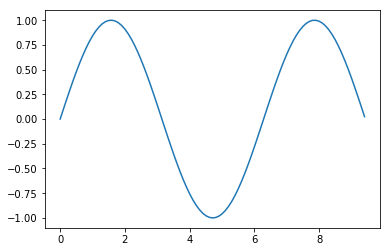

In [134]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)
plt.show()

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

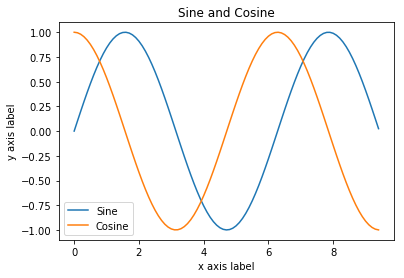

In [131]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

## Subplots

You can plot different things in the same figure using the subplot function. Here is an example:

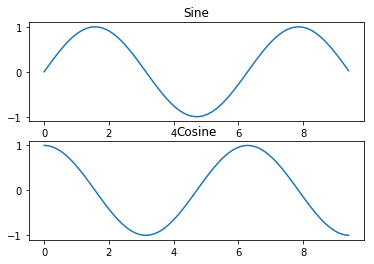

In [144]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

There are also more complex formatting options for such plots as demonstrated in the upcoming examples.

# [Scipy.Stats](https://docs.scipy.org/doc/scipy/reference/stats.html)

Scipy is a scientific computing library with many useful submodules. Many of you coming from R will find the Scipy.Stats module useful as it contains statistical functions that can sample from and calculate the pdfs of common distribution. For example, consider the following [tutorial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.foldnorm.html#scipy.stats.foldnorm) with the folded normal distribution.

mean:1.9693959800032417
var: 0.9239794739470715
skew:0.20293492205914787
kurt:-0.2951986521710155


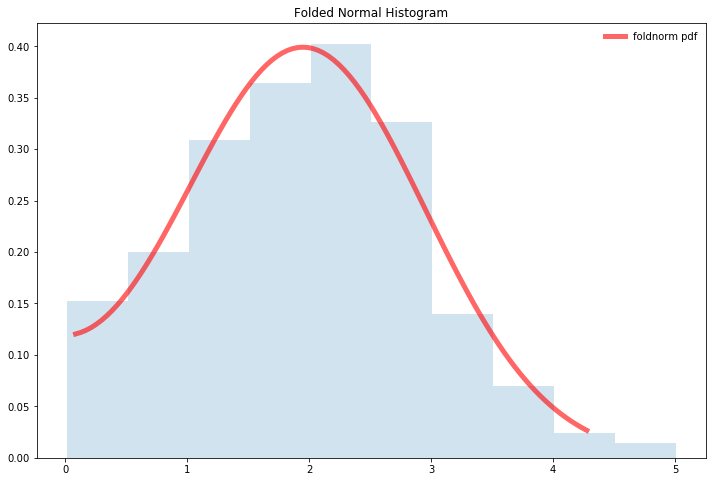

In [122]:
from scipy.stats import foldnorm
fig, ax = plt.subplots(1, 1)
c = 1.95 # Shape parameter

# Calculate & print the moments
mean, var, skew, kurt = foldnorm.stats(c, moments='mvsk')
print("mean:{}\nvar: {}\nskew:{}\nkurt:{}".format(mean, var, skew, kurt))

# Plot the probability density function (pdf):
x = np.linspace(foldnorm.ppf(0.01, c), foldnorm.ppf(0.99, c), 100)
ax.plot(x, foldnorm.pdf(x, c), 'r-', lw=5, alpha=0.6, label='foldnorm pdf')

# Generate random numbers and compare the histogram:
r = foldnorm.rvs(c, size=1000)
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
ax.set_title('Folded Normal Histogram')
# Display Plot
plt.show()

# [Scikit-Learn](http://scikit-learn.org/stable/documentation.html)

Scikit-Learn is an open source machine learning library which implements many standard off-the-shelf machine learning algorithms and utility functions. Even if you are not using any of the models from this library, you will find a lot of the built in functionality useful in running your own experiments. For example consider the following [tutorial](http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html#sphx-glr-auto-examples-plot-cv-predict-py) which efficiently plots cross validated predictions from a linear regression against their true values.  

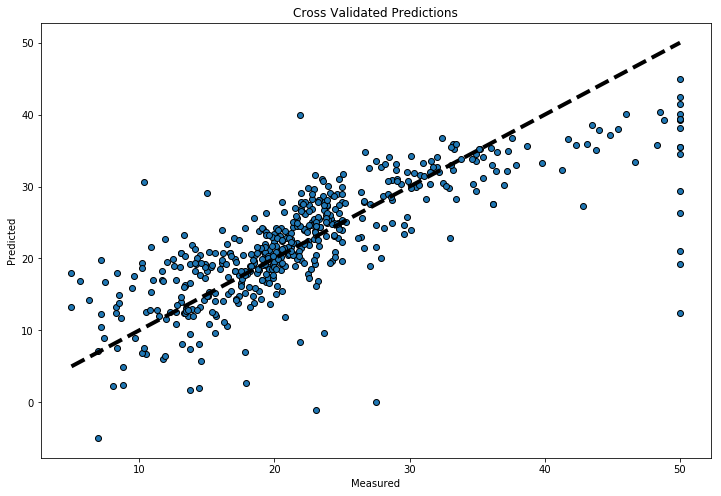

In [115]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

lr = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Cross Validated Predictions')
plt.show()

# Publishing Completed Notebooks

Under the 'File' tab select 'Download as' in order to publish your notebook to the desired format.